# 결정 경계
분류기가 분류한 두 클래스를 나누는 경계선을 의미<br>
로지스틱 회귀는 이진 분류 모델로서, 입력 데이터의 특징값을 바탕으로 해당 데이터가 어느 클래스에 속하는지를 판단하는 모델이다. 로지스틱 회귀 모델의 학습 결과는 wegiht와 bias값이며, 이를 사용하여 결정 경계를 계산할 수 있다.<br>
로지스틱 회귀의 결정 경계는 결정 경계 함수로 나타낼 수 있으며, 이 함수는 입력 데이터를 분류하는 임계값을 지정하여 결정 경계를 나타낸다. 이 함수는 일반적으로 시그모이드 함수를 사용한다.

- 로지스틱 회귀의 결정 경계 구현 방법
1. 학습된 가중치와 편향을 사용해 결정 경계 함수 정의
2. 결정 경계 함수의 결과를 임계값과 비교하여 분류 결과 결정
3. 결정 경계 시각화 -> 결정 경계는 일반적으로 2차원 평면 상에 그려짐

## 로지스틱 회귀의 결정 경계 실습

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

### 임의의 데이터 생성

In [2]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0.5) & (x[:,1] > 0.5)).float()

print(x, y)

tensor([[ 1.7398e+00,  1.1229e+00],
        [ 7.6223e-01, -2.2581e+00],
        [-9.8151e-01, -4.8253e-01],
        [-1.9194e+00, -1.6465e+00],
        [-4.1676e-01, -4.6751e-01],
        [ 5.3208e-01,  1.0757e+00],
        [-4.1466e-01, -1.8873e+00],
        [ 8.0690e-01,  2.4821e-01],
        [-4.9227e-01,  1.5422e-01],
        [-4.4869e-01, -9.4349e-01],
        [ 3.0794e-02, -3.7951e-01],
        [-1.1604e+00, -2.0733e-01],
        [ 1.3053e+00,  7.9413e-02],
        [ 1.0144e+00, -3.0438e-02],
        [ 1.1498e-02,  7.2414e-01],
        [-3.0742e-02,  2.7042e-01],
        [-9.7842e-01, -7.2545e-01],
        [-1.9088e+00, -3.3563e-01],
        [ 5.6664e-02,  2.3798e-02],
        [ 5.6975e-01, -1.7295e+00],
        [-1.6481e+00, -8.7383e-01],
        [ 8.1591e-01, -1.1455e+00],
        [ 1.4051e+00,  7.3641e-01],
        [-3.8171e-01, -4.1211e-01],
        [-9.4667e-01, -7.7998e-01],
        [-2.2661e-01, -8.9424e-01],
        [-2.1444e-01,  7.6485e-01],
        [-7.6888e-01,  5.258

In [3]:
class LogisticRegression(torch.nn.Module):
    def __init__ (self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        
        return F.sigmoid(out)
    
model = LogisticRegression(input_dim = 2, output_dim=1)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### 모델 학습

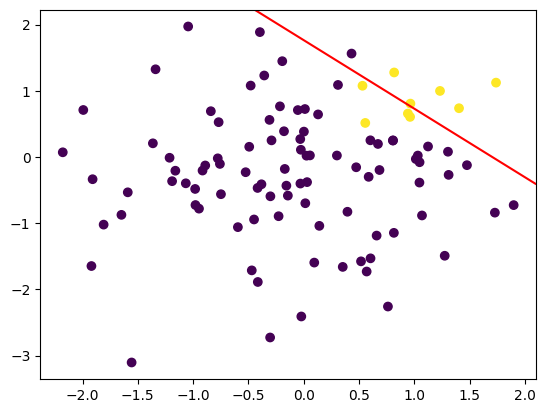

In [7]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# 결정 경계 그리기
plt.scatter(x[:, 0], x[:, 1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
plt.show()

로지스틱 회귀 모델은 입력 데이터를 선형 결합으로 변환하고, 시그모이드 함수를 사용하여 출력을 확률로 변환한다.<br>
분류 경계선은 출력이 0.5가 되는 지점으로 결정된다.<br>
위 그래프에서 보라색과 노란색 영역 사이의 경계선은 결정 경계이다. 이 결정 경계는 노란색 클래스와 보라색 클래스를 가장 잘 구분하는 선이다.<br>
결정 경계는 로지스틱 회귀 모델이 학습한 파라미터에 따라 달라진다. 이 예제에서는 학습된 모델의 파라미터를 사용하여 결정 경계를 그렸다. 따라서 이 모델의 결정 경계는 위 그래프에서 볼 수 있는 직성 형태를 가진다.